0.0


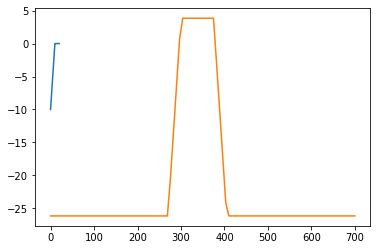

In [2]:
import math

from bin.euro_option import EuroCall, EuroPut
from bin.portfolio import Portfolio
from bin.stock import Stock

if __name__ == '__main__':
    stock_1 = Stock(10, 3)
    call_2 = EuroCall(10, 3, True)
    portfolio = Portfolio([call_2, stock_1])
    portfolio.graph_payoff(start=0, end=call_2.K * 2)

    # Iron Condor of Amazon
    portfolio = Portfolio([EuroCall(K=405, T=1, is_short=False, price="BSM", S0=332),
                           EuroCall(K=375, T=1, is_short=True, price="BSM", S0=332),
                           EuroPut(K=300, T=1, is_short=True, price="BSM", S0=332),
                           EuroPut(K=270, T=1, is_short=False, price="BSM", S0=332)])

    portfolio.graph_profit(start=0, end=700)

    # Condor of Amazon
    portfolio = Portfolio([EuroCall(K=405, T=1, is_short=False, price="BSM", S0=332),
                           EuroCall(K=375, T=1, is_short=True, price="BSM", S0=332),
                           EuroCall(K=300, T=1, is_short=True, price="BSM", S0=332),
                           EuroCall(K=270, T=1, is_short=False, price="BSM", S0=332)])
    # verify put-call parity
    K = 10
    T = 1
    r = 0.01
    S0 = 5
    call = EuroCall(K=K, T=T, price="BSM", S0=5, r=r)
    put = EuroPut(K=K, T=T, price="BSM", S0=5, r=r)
    c = call.price
    p = put.price
    print(c + K * math.exp(-r * T) - p - S0)
